In [26]:
# winequality-white.csv에서 데이터 읽기
# 각 속성과 quality간의 상관관계 검토
#선생님
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats



In [29]:
whitewine = pd.read_csv('data-files/winequality-white.csv', sep=';')

In [33]:
# whitewine.info() # dataframe 데이터 확인
whitewine.describe() # 간단한 통계 정보
# whitewine["quality"].unique() #wine의 등급은 3~9등급

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<Figure size 720x720 with 0 Axes>

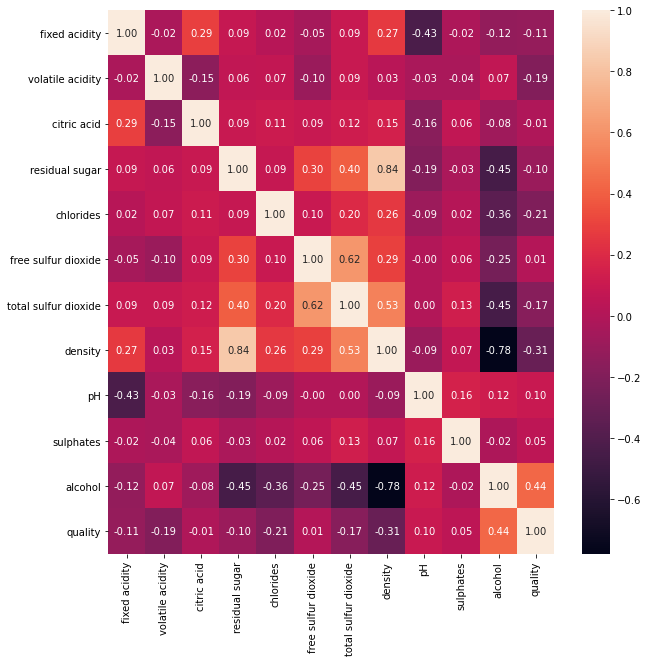

In [42]:
# whitewine.corr()
plt.figure(figsize=(10, 10))
whitewine.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(whitewine.corr(), annot=True, fmt='.2f') # 소수점 둘째자리까지
plt.show()

In [45]:
# whitewine[["density", "alcohol", 'quality']].corr()
sp.stats.pearsonr(whitewine['density'], whitewine['quality']), sp.stats.pearsonr(whitewine['alcohol'], whitewine['quality']) # 피어슨 상관계수 -> (correlation, pvalue)로 나옴

((-0.3071233127347312, 1.7279878711721477e-107),
 (0.4355747154613762, 5.614770253715724e-226))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats

In [13]:
cols = ['age', 'workclass', 'fnlwg', 'education', 'education-num', 
        'marital-status','occupation','relationship', 'race','sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
census = pd.read_csv('data-files/census.csv', names=cols)
census_backup = census.copy() # 원본수정되었을 때 원본 보려고


In [14]:
census.info() # non-null : 전처리 완료된 데이터 , Dtype object -> 문자열 -> category화 되어야 함
census.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwg           32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwg,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
census['hours-per-week-categories'] = pd.cut(census['hours-per-week'], [0, 9, 19, 29, 39, 49, 1000], labels=["0-9", "10-19", "20-29", "30-39", "40-49", "50+"]) # 가운데는 bins=임

census.head()

,age,workclass,fnlwg,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,hours-per-week-categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49


In [26]:
data = census[['sex', 'hours-per-week-categories']]
data.head()

,sex,hours-per-week-categories
0,Male,40-49
1,Male,10-19
2,Male,40-49
3,Male,40-49
4,Female,40-49


In [27]:
contingency_table = pd.crosstab(data['sex'], data['hours-per-week-categories'], margins=True) # margins는 총계 # male쪽에 데이터가 더 많다 
contingency_table # 카이제곱 분포

hours-per-week-categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [32]:
sp.stats.chi2_contingency(contingency_table.iloc[:2, :6].values)[:3] # 통계량 -> ,여자 남자가 시간이 다르지 않다(같다)는 귀무가설에서 위의 테이블이 나올 확률 0,자유도

(2287.190943926107, 0.0, 5)

In [33]:
ct = pd.crosstab(census['income'], census['education'], margins=True) # 소득분위가 교육에 영향을 미치는가
ct

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
income,,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904,24720
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387,7841
All,933,1175,433,168,333,646,514,1067,1382,5355,413,10501,1723,51,576,7291,32561


In [34]:
sp.stats.chi2_contingency(ct.iloc[:2, :len(ct.columns)-1])[:3] # 카이제곱통계량 , 통계량으로 확률을 계산했더니 0,(r-1)(c-1) 자유도

(4429.653302288619, 0.0, 15)

In [35]:
ct = pd.crosstab(census['income'], census['marital-status'], margins=True)

In [36]:
ct

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
income,,,,,,,,
<=50K,3980,13,8284,384,10192,959,908,24720
>50K,463,10,6692,34,491,66,85,7841
All,4443,23,14976,418,10683,1025,993,32561


In [41]:
ct2

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
income,,,,,,,
<=50K,3980,13,8284,384,10192,959,908
>50K,463,10,6692,34,491,66,85


In [40]:
ct2 = pd.crosstab(census['income'], census['marital-status'])
print(ct2.iloc[0, :] / ct2.iloc[0].sum())
print(ct2.iloc[1, :] / ct2.iloc[1].sum())

marital-status
 Divorced                 0.161003
 Married-AF-spouse        0.000526
 Married-civ-spouse       0.335113
 Married-spouse-absent    0.015534
 Never-married            0.412298
 Separated                0.038794
 Widowed                  0.036731
Name:  <=50K, dtype: float64
marital-status
 Divorced                 0.059049
 Married-AF-spouse        0.001275
 Married-civ-spouse       0.853463
 Married-spouse-absent    0.004336
 Never-married            0.062620
 Separated                0.008417
 Widowed                  0.010840
Name:  >50K, dtype: float64


In [37]:
sp.stats.chi2_contingency(ct.iloc[:2, :len(ct.columns)-1])[:3] # 확률 0 -> chi2_contingency의 귀무가설(default)(서로 관계가 없다) 기각 ->  관계가 있다

(6517.741653663021, 0.0, 6)

In [44]:
demo_data = pd.read_csv('data-files/t-and-anova-demo.csv')
demo_data_backup = demo_data.copy()

In [47]:
demo_data.info()
demo_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        285008 non-null  int64  
 1   Year                          285008 non-null  int64  
 2   Department Title              285008 non-null  object 
 3   Payroll Department            231463 non-null  float64
 4   Record Number                 285008 non-null  object 
 5   Job Class Title               285008 non-null  object 
 6   Employment Type               285008 non-null  object 
 7   Hourly or Event Rate          263987 non-null  object 
 8   Projected Annual Salary       285008 non-null  object 
 9   Q1 Payments                   285008 non-null  object 
 10  Q2 Payments                   285008 non-null  object 
 11  Q3 Payments                   285008 non-null  object 
 12  Q4 Payments                   285008 non-nul

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [51]:
demo_data = demo_data[pd.notnull(demo_data['Payroll Department'])]
demo_data.rename(columns = {'Projected Annual Salary': 'Annual_sal',
                            'Job Class Title': 'Job_title','Base Pay' : 'Base_Pay'}, inplace=True)

In [57]:
for i in ['Hourly or Event Rate', 'Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
          demo_data[i] = demo_data[i].str.replace('$','') # $ 없애기

In [58]:
demo_data.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job_title,Employment Type,Hourly or Event Rate,Annual_sal,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,25.12,52450.56,11331.00,...,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,42.77,89303.76,20036.32,...,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,28.75,60028.96,15793.88,...,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,30.92,64553.13,14700.00,...,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf
6,59695,2014,Airports (LAWA),101.0,4237826094,Custodian - Airports,Full Time,22.95,47911.51,13493.87,...,SERVICE EMPLOYEES UNIT,4,3156,A,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/3156.pdf


In [70]:
# print(demo_data['Annual_sal'].isna().sum())
# print((demo_data['Base_Pay'].isna().sum()))
demo_data['Annual_sal']=demo_data['Annual_sal'].astype(float)
demo_data['Base_Pay']=demo_data['Base_Pay'].astype(float)

In [74]:
print(demo_data.groupby('Year')["Annual_sal"].mean())
print(demo_data.groupby('Year')["Annual_sal"].count())

Year
2013    74571.837482
2014    77318.905443
2015    76046.391525
2016    78711.199872
Name: Annual_sal, dtype: float64
Year
2013    47094
2014    46212
2015    48687
2016    89470
Name: Annual_sal, dtype: int64


In [75]:
demo_data_2015 = demo_data[demo_data['Year'] == 2015]
demo_data_2016 = demo_data[demo_data['Year'] == 2016]

In [76]:
demo_data_2015.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job_title,Employment Type,Hourly or Event Rate,Annual_sal,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
32,114364,2015,Aging,302.0,743477525,Administrative Clerk,Part Time,18.61,38857.68,5260.80,...,CLERICAL,2,1358,0,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/1358.pdf
33,114365,2015,Aging,302.0,1581946655,Administrative Clerk,Part Time,18.61,38857.68,0.00,...,CLERICAL,2,1358,0,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/1358.pdf
34,114366,2015,Aging,302.0,1830305085,Program Aide - Aging,Part Time,16.80,35078.40,0.00,...,ADMINISTRATIVE,2,1534,0,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/1534.pdf
35,114367,2015,Aging,302.0,2399465256,Program Aide - Aging,Part Time,16.80,35078.40,0.00,...,ADMINISTRATIVE,2,1534,0,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/1534.pdf
44,114368,2015,Aging,302.0,4189935327,Program Aide - Aging,Part Time,16.80,35078.40,0.00,...,ADMINISTRATIVE,2,1534,0,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/1534.pdf


In [79]:
print(demo_data_2015["Annual_sal"].mean(), demo_data_2016["Annual_sal"].mean())
sp.stats.ttest_ind(demo_data_2015["Annual_sal"].values, demo_data_2016["Annual_sal"].values, equal_var=True) # 유의미한 차이인지는 p값보고!

76046.39152504776 78711.19987224769


Ttest_indResult(statistic=-13.996549614885485, pvalue=1.7550355810799108e-44)